In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load date
data_file = 'energy+efficiency/ENB2012_data.xlsx'

dataframe = pd.read_excel(data_file)

dataframe.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
dataframe.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
dataframe.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
# detect outliers
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope(contamination=0.5)
outlier_detector.fit(dataframe)
outlier_detector.predict(dataframe)

/home/hadisasadi/myenv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:749: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/hadisasadi/myenv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31.074521649256411 > -31.889437711450665). You may want to try with a higher value of support_fraction (current value: 0.508).
  warnings.warn(
/home/hadisasadi/myenv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-31.412065444289006 > -32.538842244123124). You may want to try with a higher value of support_fraction (current value: 0.508).
  warnings.warn(
/home/hadisasadi/myenv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

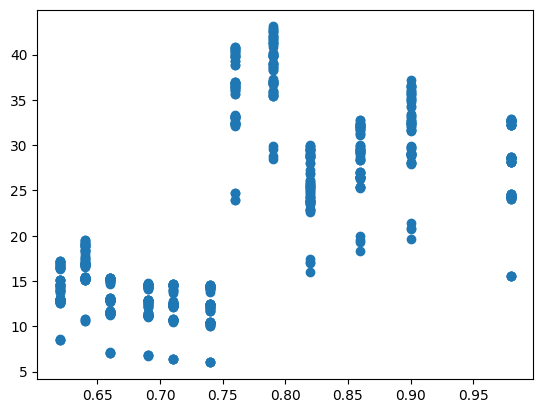

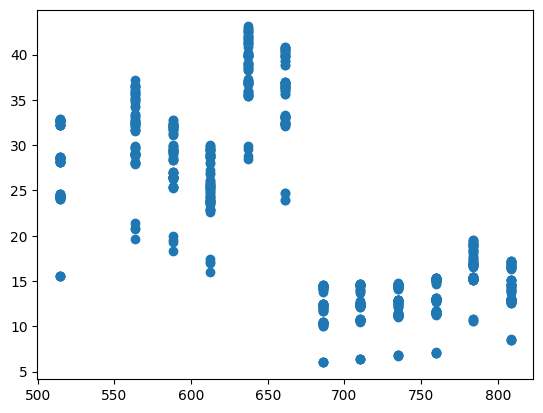

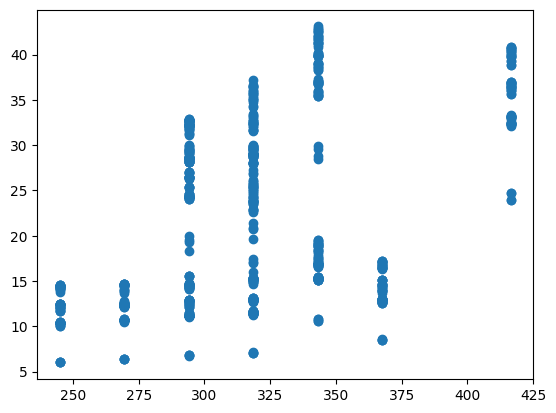

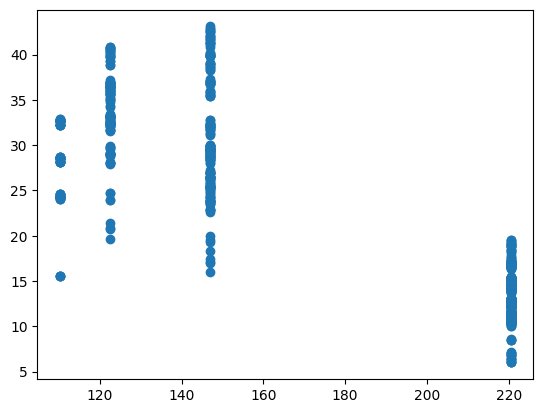

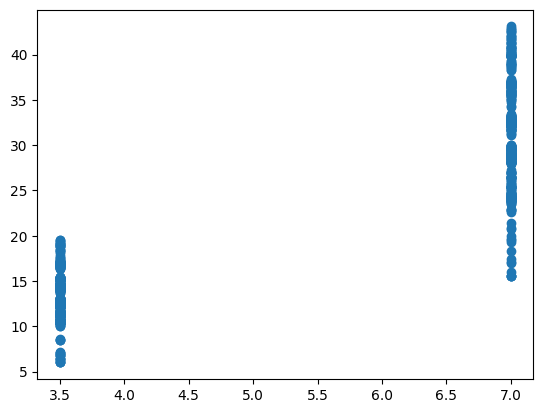

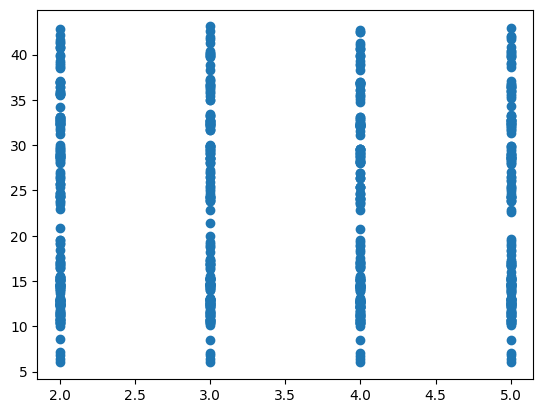

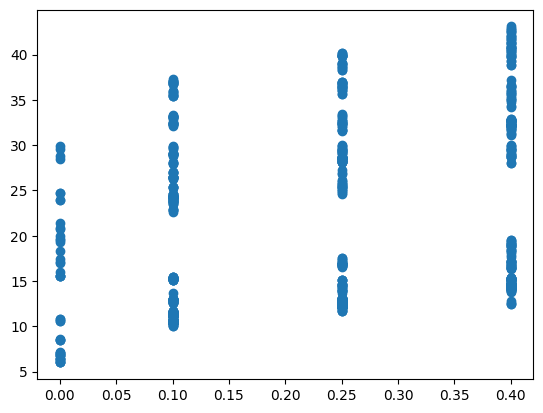

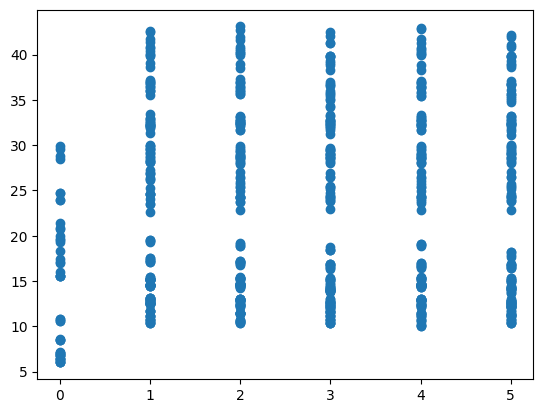

In [7]:
columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
for column in columns:
    plt.scatter(dataframe[column],dataframe["Y1"] )
    plt.show()

In [9]:
# normalize with robust scaler
dataframe_remove_y2 = dataframe.drop(['Y2'] , axis=1)
dataframe_remove_y2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [30]:
from sklearn import preprocessing

# create a robust scaler
robust_scaler = preprocessing.RobustScaler()
array_robust = robust_scaler.fit_transform(dataframe_remove_y2)
array_robust

array([[ 1.55932203, -1.18181818, -0.5       , ..., -0.83333333,
        -1.33333333, -0.18206158],
       [ 1.55932203, -1.18181818, -0.5       , ..., -0.83333333,
        -1.33333333, -0.18206158],
       [ 1.55932203, -1.18181818, -0.5       , ..., -0.83333333,
        -1.33333333, -0.18206158],
       ...,
       [-0.88135593,  1.        ,  1.        , ...,  0.5       ,
         0.88888889, -0.13440428],
       [-0.88135593,  1.        ,  1.        , ...,  0.5       ,
         0.88888889, -0.13226238],
       [-0.88135593,  1.        ,  1.        , ...,  0.5       ,
         0.88888889, -0.12369478]])

dataframe[x1]

In [ ]:
# convert array to dataframe
dataframe_robust = pd.DataFrame(array_robust , columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','Y1'])
dataframe_robust

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,1.559322,-1.181818,-0.5,-0.923077,0.5,-1.000000,-0.833333,-1.333333,-0.182062
1,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.333333,-0.833333,-1.333333,-0.182062
2,1.559322,-1.181818,-0.5,-0.923077,0.5,0.333333,-0.833333,-1.333333,-0.182062
3,1.559322,-1.181818,-0.5,-0.923077,0.5,1.000000,-0.833333,-1.333333,-0.182062
4,1.016949,-0.818182,0.0,-0.769231,0.5,-1.000000,-0.833333,-1.333333,0.101205
...,...,...,...,...,...,...,...,...,...
763,-0.745763,0.818182,0.5,0.461538,-0.5,1.000000,0.500000,0.888889,-0.057296
764,-0.881356,1.000000,1.0,0.461538,-0.5,-1.000000,0.500000,0.888889,-0.129050
765,-0.881356,1.000000,1.0,0.461538,-0.5,-0.333333,0.500000,0.888889,-0.134404
766,-0.881356,1.000000,1.0,0.461538,-0.5,0.333333,0.500000,0.888889,-0.132262


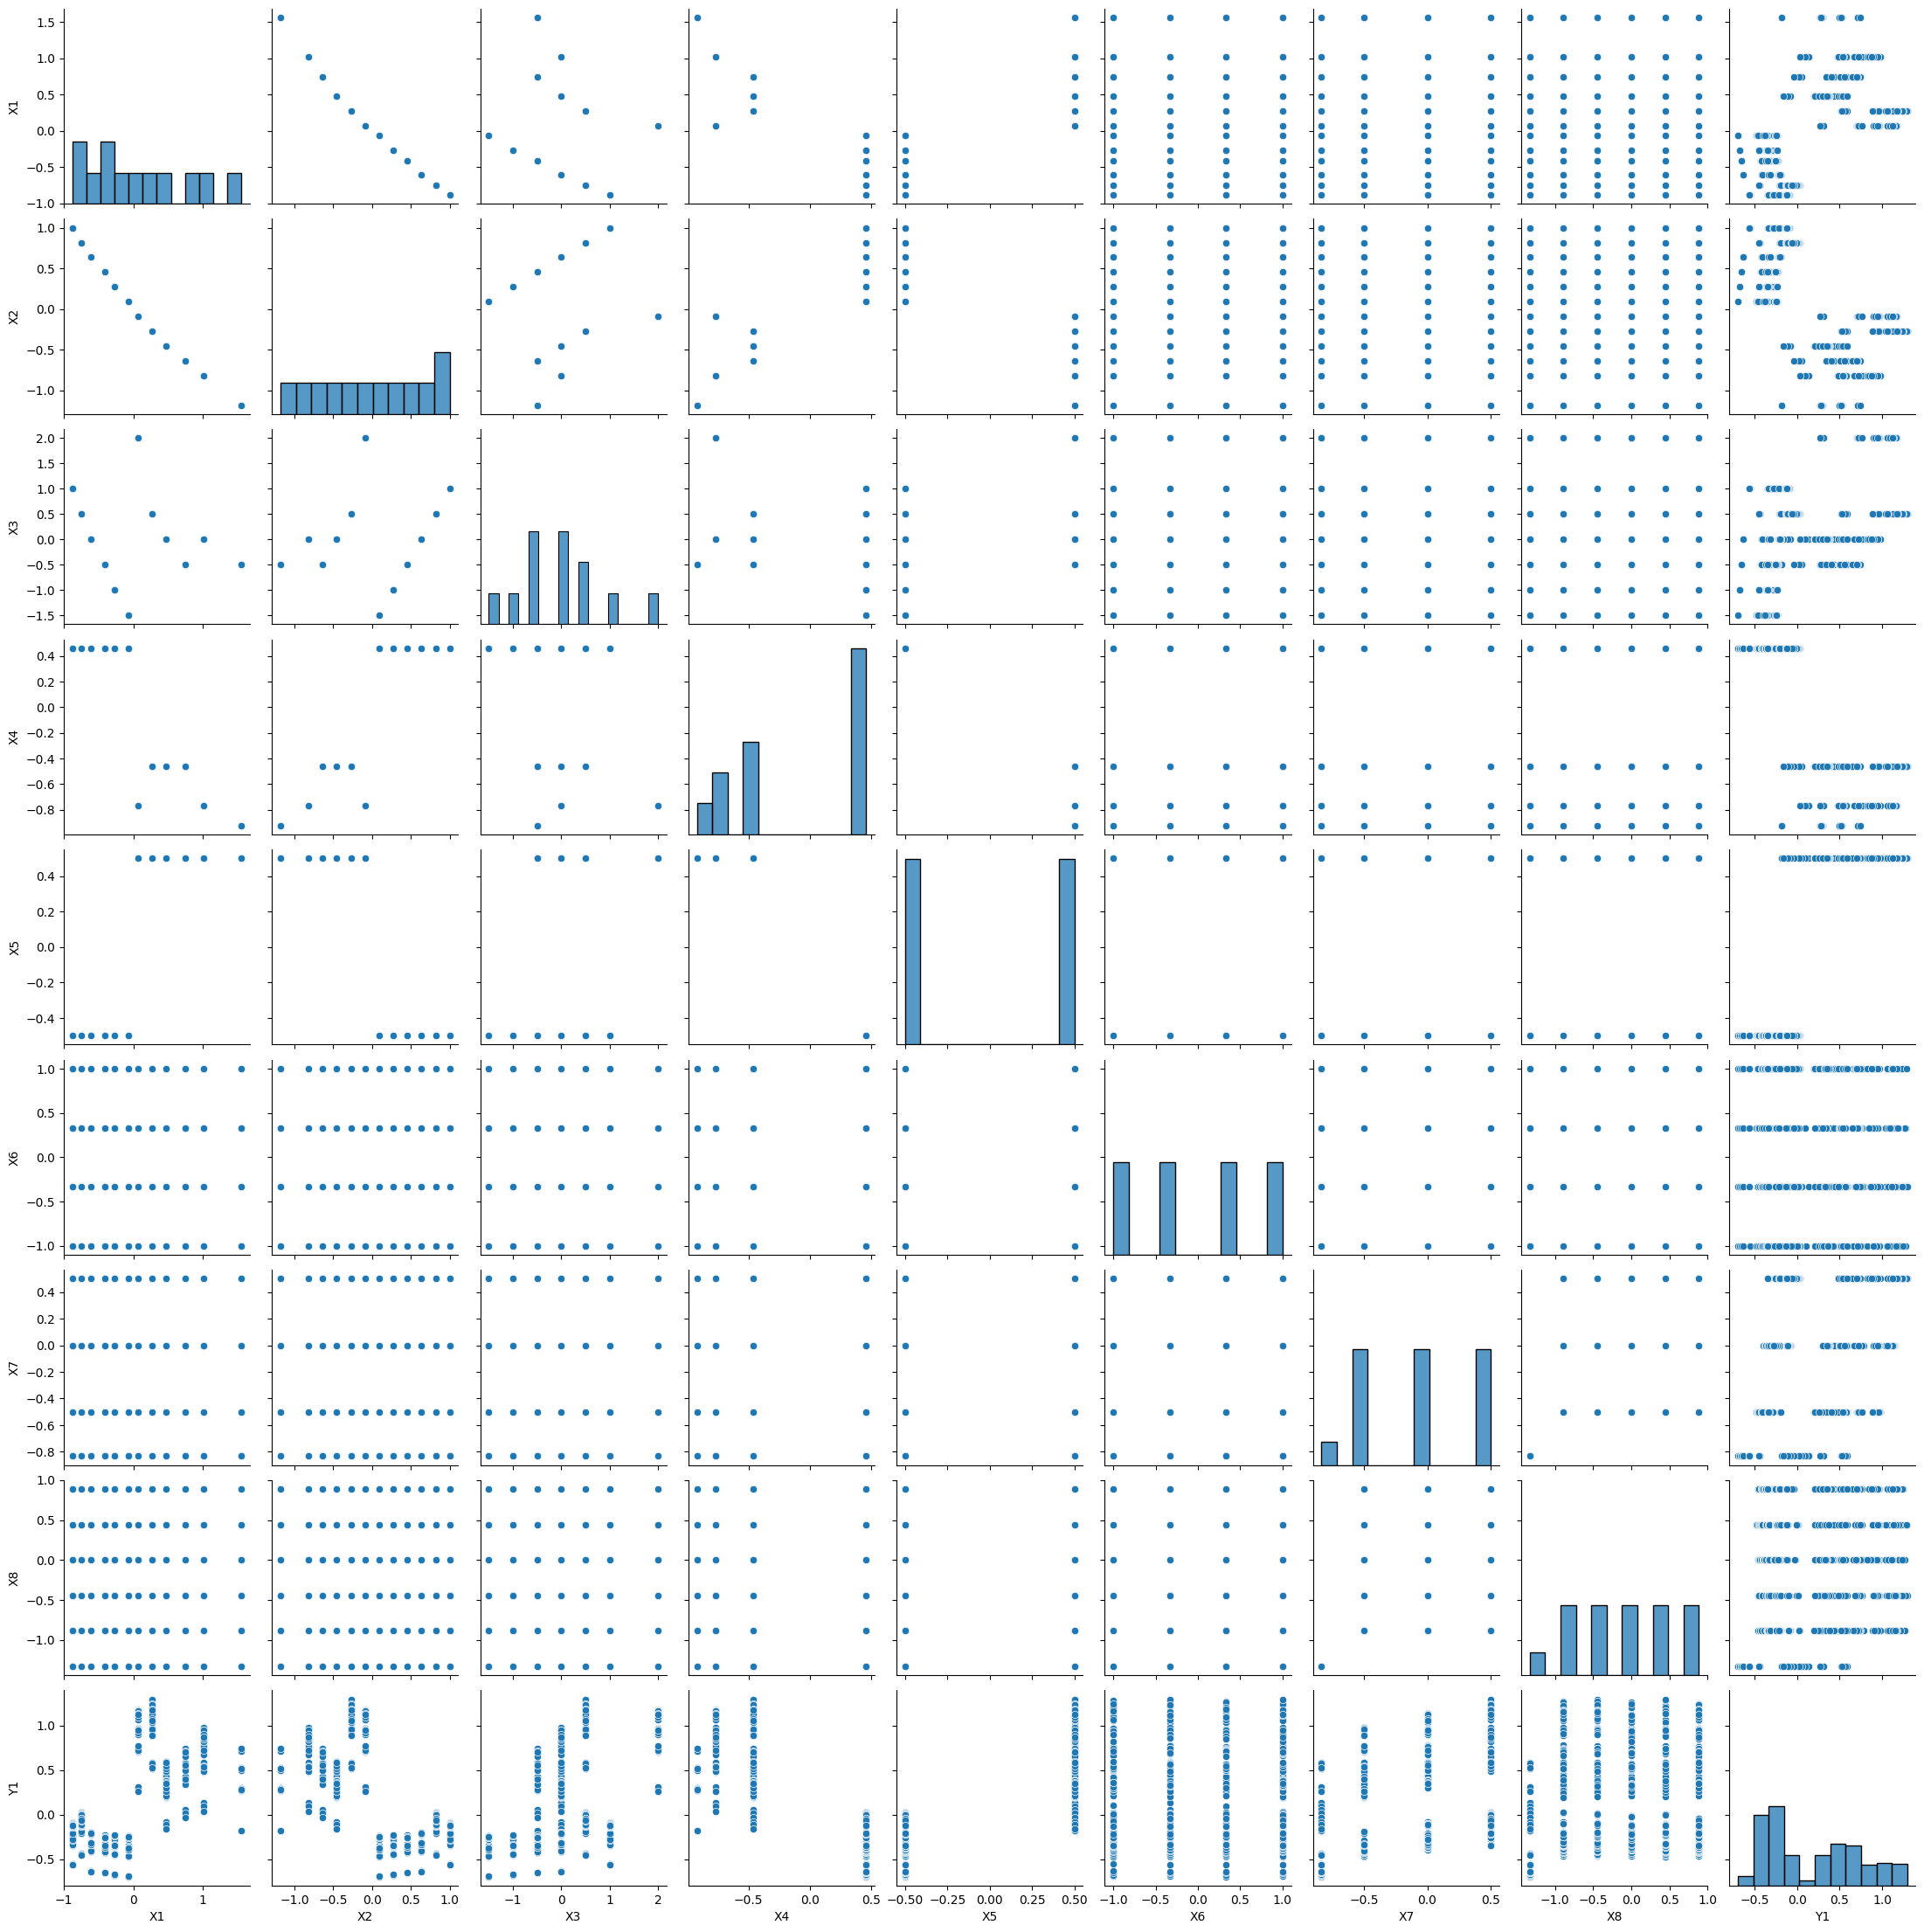

In [25]:
sns.pairplot(dataframe_robust)

<Axes: >

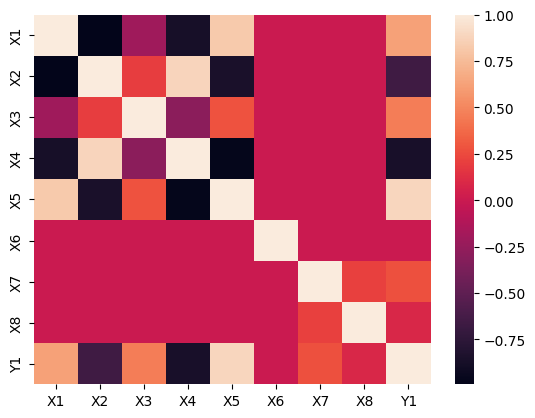

In [ ]:
# correlation matrix
sns.heatmap(dataframe_robust.corr())